# Práctica 5: transformación de datos categóricos

##### Cookbook [@calidad-y-pre-procesamiento-de-datos-2020-1](https://nbviewer.jupyter.org/github/JacoboGGLeon/calidad-y-pre-procesamiento-de-datos-2020-1/blob/master/README.ipynb)

## Resources

* [Catalog of Variable Transformations To Make Your Model Work Better](https://towardsdatascience.com/catalog-of-variable-transformations-to-make-your-model-works-better-7b506bf80b97)
* [A guide to Data Transformation](https://medium.com/analytics-vidhya/a-guide-to-data-transformation-9e5fa9ae1ca3)
* [Introduction to Transforming Data](https://developers.google.com/machine-learning/data-prep/transform/introduction)
* [Python ETL Tools: Best 8 Options](https://avikcloud.com/python-etl-tools/)

## Recipe 

Los modelos de aprendizaje automático sólo pueden manejar variables numéricas. Por lo tanto, si una columna tiene una variable categórica, los modelos sólo funcionarán cuando esté codificada como variable numérica. La forma de codificar es uno de los elementos clave del desempeño en la modelación a partir de los datos.

### Transformación de variables numéricas

Es convertir una variable categórica en una variable numérica. La transformación de variables categóricas es casi obligatoria para la mayoría de los modelos de aprendizaje de máquinas porque sólo pueden manejar valores numéricos. También se denomina codificación (encoding), o en la minería de textos, la incrustación (embedding). (Tarea encoding y embedding)

#### Información general sobre la transformación de datos

Existen muchas técnicas de transformación de datos, entre ellas, hay muchas que utilizan parámetros, como la media y la desviación estándar de la normalización o una tabla de conversión en la codificación de categorías. Un error común en el uso de la transformación variable es transformar el conjunto de entrenamiento y el conjunto de pruebas por separado utilizando parámetros diferentes. La transformación de los datos de entrenamiento y los datos de prueba debe hacerse utilizando los mismos parámetros, y normalmente se obtienen del conjunto de entrenamiento; de lo contrario, no podemos comparar los resultados justamente. 

![imagen.png](https://miro.medium.com/max/885/1*-5zPf5uVBbKKEtTfw2ixAg.png)

Algunos dirán más estrictamente que cuando se trabaje con validación cruzada, los parámetros de transformación se derivarán sólo del volúmen de entrenamiento (k-fold), entonces los datos del volúmen de validación se transformarán por esos parámetros, en lugar de transformar todos los datos de entrenamiento antes de la validación cruzada. Ese enfoque podría ser necesario cuando se prevé que hay enormes diferencias en la distribución de los datos entre los volúmen. La presencia de valores atípicos es una posible razón para dar parámetros diferentes, en particular en las técnicas de transformación sensibles a los valores atípicos, como la escala mín-máx.

De cualquier manera, los científicos de datos siempre tienen que preguntarse cuál es el enfoque más razonable para los datos a los que se enfrentan.

In [19]:
conda install -c conda-forge category_encoders

Solving environment: done

## Package Plan ##

  environment location: /home/vagrant/anaconda3

  added / updated specs:
    - category_encoders


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    category_encoders-2.1.0    |             py_0          48 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          48 KB

The following NEW packages will be INSTALLED:

  category_encoders  conda-forge/noarch::category_encoders-2.1.0-py_0



category_encoders-2. | 48 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


#### Codificación de un paso (one-hot encoding)

La codificación de un paso es un enfoque para convertir una columna categórica en múltiples columnas binarias (0 o 1), tantas como el número de niveles o categorías distintas de la columna original. Por ejemplo, si hay cuatro niveles en la variable categórica, la codificación de un paso creará cuatro nuevas columnas, cada una de las cuales tiene 0 o 1 y representa si la columna original tiene el nivel.

![imagen.png](https://miro.medium.com/max/522/1*QnHLFROCxOjSu9GjF5wMBA.png)
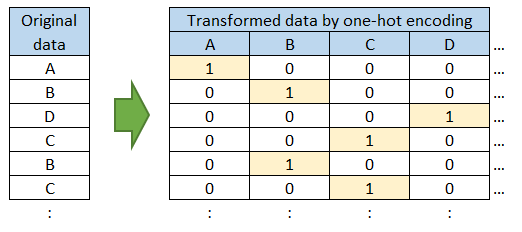

Una desventaja de la codificación de un paso es que el número de columnas se incrementa fácilmente con muchos niveles distintos. Una posible solución es agrupar algunos niveles sobre la base del conocimiento del dominio o agrupar los niveles poco frecuentes en "otro" nivel.


In [1]:
import pandas as pd

df = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
df

,v1,v2
0,A,10
1,B,11
2,D,2
3,C,0
4,B,30
5,C,50


La codificación de un paso se puede hacer la función `get_dummies` de `pandas` o con el `OneHotEncoder` de `scikit-learn`.

In [2]:
pd.get_dummies(df,columns=['v1'])

,v2,v1_A,v1_B,v1_C,v1_D
0,10,1,0,0,0
1,11,0,1,0,0
2,2,0,0,0,1
3,0,0,0,1,0
4,30,0,1,0,0
5,50,0,0,1,0


#### Codificación de etiquetas (label encoding)

La codificación de etiquetas es un enfoque para convertir los niveles en enteros. Este enfoque no es apropiado en la mayoría de los algoritmos de aprendizaje automático porque la cantidad de valor transformado en realidad no tiene nada que ver con la variable objetivo, excepto los modelos basados en el árbol de decisión que pueden ser capaces de dividir la columna numérica transformada varias veces con la estratificación del nodo del árbol. Además, en el caso de que la variable categórica tenga una naturaleza "ordinal", por ejemplo, Frío < Calor < Caliente < Muy caliente, la codificación de etiquetas puede funcionar potencialmente mejor que otras técnicas de codificación.

![imagen.png](https://miro.medium.com/max/287/1*nvjQSDKNh6NWc2CMi4Khkw.png)
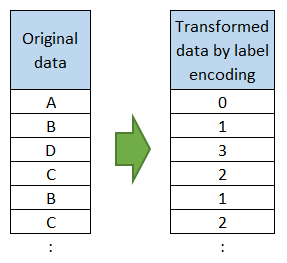

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
df

,v1,v2
0,A,10
1,B,11
2,D,2
3,C,0
4,B,30
5,C,50


Se puede implementar la codificación de etiquetas con la función `LabelEncoder` de `scikit-learn`.

In [7]:
le = LabelEncoder()
le.fit(df['v1'])
df['v1_le'] = le.transform(df['v1'])
df

,v1,v2,v1_le
0,A,10,0
1,B,11,1
2,D,2,3
3,C,0,2
4,B,30,1
5,C,50,2


#### Feature hash

*Feature hash* es un enfoque para convertir una columna categórica en múltiples columnas usando trucos de hashing. Puede definir el número de nuevas columnas a las que convierte, que puede ser menor que el número de niveles en las columnas categóricas. En lugar de asignar 0 o 1 como una codificación de un solo dígito, el hashing de características utiliza más de dos valores (-1, 0 o 1 en el caso que se indica a continuación).

![imagen.png](https://miro.medium.com/max/466/1*cx3svceZza0G5tZhLM4_7w.png)

Este etiquetado puede cubrir la deficiencia de la codificación de un solo paso que genera demasiadas columnas después de la transformación. Sin embargo, tener demasiadas columnas ya no es una cuestión fatal en las recientes técnicas avanzadas de modelado, por lo que el "hashing" de características no se utiliza ampliamente. Además, tener más de dos valores posibles en una nueva columna puede no ser bueno para algunos modelos.
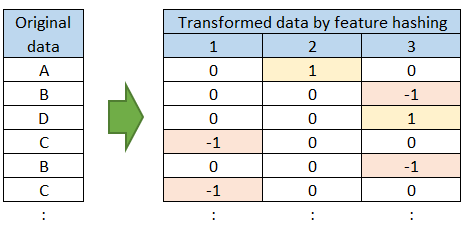

In [8]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

df = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
df

,v1,v2
0,A,10
1,B,11
2,D,2
3,C,0
4,B,30
5,C,50


Se puede utilizar la función `FeatureHasher` de `scikit-learn` para realizar este método.

In [16]:
fh = FeatureHasher(n_features=3, input_type='string')
hashed = fh.transform(df[['v1']].astype(str).values)
hashed = pd.DataFrame(hashed.todense())
hashed

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,-1.0
2,0.0,0.0,1.0
3,-1.0,0.0,0.0
4,0.0,0.0,-1.0
5,-1.0,0.0,0.0


In [17]:
hashed.columns = ['v1_fh' + str(i) for i in hashed.columns]
pd.concat([df, hashed], axis=1)

,v1,v2,v1_fh0,v1_fh1,v1_fh2
0,A,10,0.0,1.0,0.0
1,B,11,0.0,0.0,-1.0
2,D,2,0.0,0.0,1.0
3,C,0,-1.0,0.0,0.0
4,B,30,0.0,0.0,-1.0
5,C,50,-1.0,0.0,0.0


#### Codificación binaria

La codificación binaria es un enfoque para convertir una columna categórica en múltiples columnas binarias, minimizando al mismo tiempo el número de nuevas columnas.
En primer lugar, convertir el valor categórico en números enteros en algunos órdenes (por ejemplo, en orden alfabético o en orden de aparición para la fila superior). A continuación, se convierte en un dígito binario de tal manera que 1 a 1, 2 a 10, 5 a 101, etc. Finalmente, se diviode el dígito binario en columnas separadas, cada una de las cuales tiene un solo dígito (1 o 0).

![imagen.png](https://miro.medium.com/max/1400/1*HvPRzN2SQBCkmUxbN-jYKQ.png)
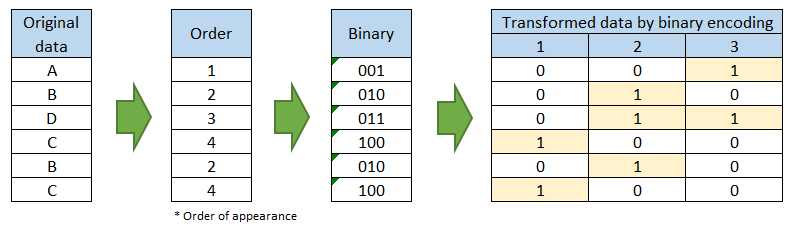

In [25]:
from category_encoders import BinaryEncoder
import pandas as pd
df_x = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
be = BinaryEncoder()
df_be = be.fit_transform(df_x['v1'])
pd.concat([df_x,df_be],axis=1)

,v1,v2,v1_0,v1_1,v1_2
0,A,10,0,0,1
1,B,11,0,1,0
2,D,2,0,1,1
3,C,0,1,0,0
4,B,30,0,1,0
5,C,50,1,0,0


#### Codificación Base N

La codificación de Base N es la generalización de la codificación binaria en el sentido de que, en lugar de utilizar la base 2, BaseN utiliza un número arbitrario como base.
A medida que N aumenta el número de nuevas columnas se reduce, pero también significa que hay más información superpuesta dentro de las nuevas columnas que la que vimos en el caso de la codificación binaria, lo que potencialmente empeora el modelo final. Si N es infinito, la codificación de la BaseN es exactamente la misma que la de la etiqueta. Como ya se ha dicho, la codificación de etiquetas es inapropiada para la mayoría de los modelos.

![imagen.png](https://miro.medium.com/max/1400/1*vpKdWz-6o_s34Teu0MYzeg.png)
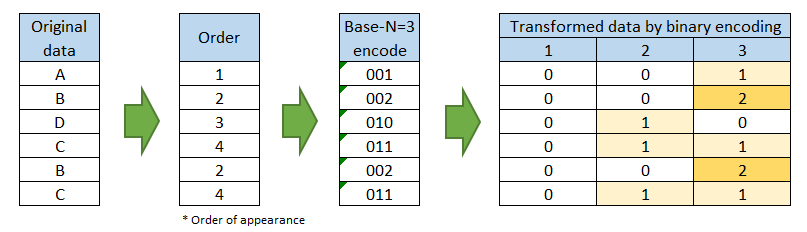

La función `BaseNEncoder` de la librería `category_encoder` puede ser útil para este método.

In [27]:
from category_encoders import BaseNEncoder
import pandas as pd

df = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
bne = BaseNEncoder(base=3)
df_bne = bne.fit_transform(df['v1'])
pd.concat([df, df_bne],axis=1)

,v1,v2,v1_0,v1_1,v1_2
0,A,10,0,0,1
1,B,11,0,0,2
2,D,2,0,1,0
3,C,0,0,1,1
4,B,30,0,0,2
5,C,50,0,1,1


#### Codificación de frecuencias

La codificación de frecuencias es un enfoque para transformar la columna categórica en una nueva columna con números enteros que representan las frecuencias de los niveles de la columna original. Esto puede funcionar bien cuando la frecuencia de los niveles es influyente para la variable objetivo.

![imagen.png](https://miro.medium.com/max/442/1*RT5-cuMWZEi2L3WKnvzOMA.png)

También se pueden convertir las frecuencias en rangos, al igual que la serialización de la codificación de frecuencias y la transformación de rangos. Tengan cuidado de que las frecuencias de los niveles tienen más probabilidades de causar empates que la clasificación de los datos originales.
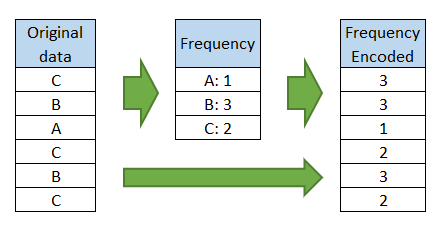

In [29]:
import pandas as pd

df_train = pd.DataFrame({'v1':['B','B','A','C','B','C'], 'v2':[10,11,2,0,30,50]})
df_test = pd.DataFrame({'v1':['C','A','B'], 'v2':[5,1,20]})
df_train

,v1,v2
0,B,10
1,B,11
2,A,2
3,C,0
4,B,30
5,C,50


No hay ninguna biblioteca (aún) que soporte esta codificación en python pero puede ser fácilmente implementada por la función nativa `value_counts()` de `pandas`.

In [31]:
freq = df_train['v1'].value_counts()
df_train['v1_fe'] = df_train['v1'].map(freq)
df_test['v1_fe'] = df_test['v1'].map(freq) # test data should be applied the same encoding rule as training data.

In [32]:
df_train

,v1,v2,v1_fe
0,B,10,3
1,B,11,3
2,A,2,1
3,C,0,2
4,B,30,3
5,C,50,2


In [33]:
df_test

,v1,v2,v1_fe
0,C,5,2
1,A,1,1
2,B,20,3


#### Target encoding (tarea)